In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [7]:
df = pd.read_csv("/Users/filippo/ScrivaniaLocale/E-HealthProject/dataset.csv",index_col=0)
print(df.head(10))

    age  gender  education  marital  income  phq_1  phq_2  phq_3  phq_4  \
0  42.0       1        5.0        1   18000      0    0.0    1.0      0   
1  51.0       3       18.0        1   23000      0    0.0    0.0      0   
2  40.0       0        8.0        1   10000      0    0.0    0.0      0   
3  19.0       0       25.0        5   31000      2    1.0    0.0      0   
4  42.0       2       13.0        1   40000      0    1.0    0.0      0   
5  48.0       2       13.0        1   11000      0    0.0    0.0      1   
6  33.0       0       22.0        2   36400      0    1.0    0.0      2   
7  55.0       2        8.0        2   28000      0    0.0    0.0      0   
8  40.0       3       18.0        3   12000      0    0.0    0.0      1   
9  46.0       2       13.0        1   35000      2    0.0    2.0      1   

   phq_5  ...  gad_6  gad_7  eheals_1  eheals_2  eheals_3  eheals_4  eheals_5  \
0      0  ...    0.0    0.0       3.0       4.0       3.0       2.0       1.0   
1      0  ..

<AxesSubplot:>

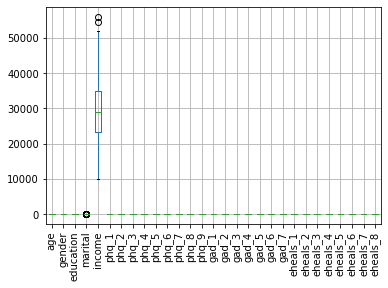

In [8]:
df.boxplot(rot=90)

In [25]:
## INCOME 
df_income = df.income
max_income = max(df_income)
min_income = min(df_income)

df_income = (df_income - min_income)/(max_income - min_income)

df['income'] = df_income

## AGE
df_age = df.age
max_age = max(df_age)
min_age = min(df_age)

df_age = (df_age - min_age)/(max_age - min_age)

df['age'] = df_age

## EDUCATION
df_education = df.education
max_education = max(df_education)
min_education = min(df_education)

df_education = (df_education - min_education)/(max_education - min_education)

df['education'] = df_education

<AxesSubplot:>

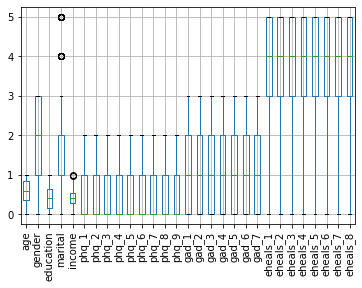

In [26]:
df.boxplot(rot=90)

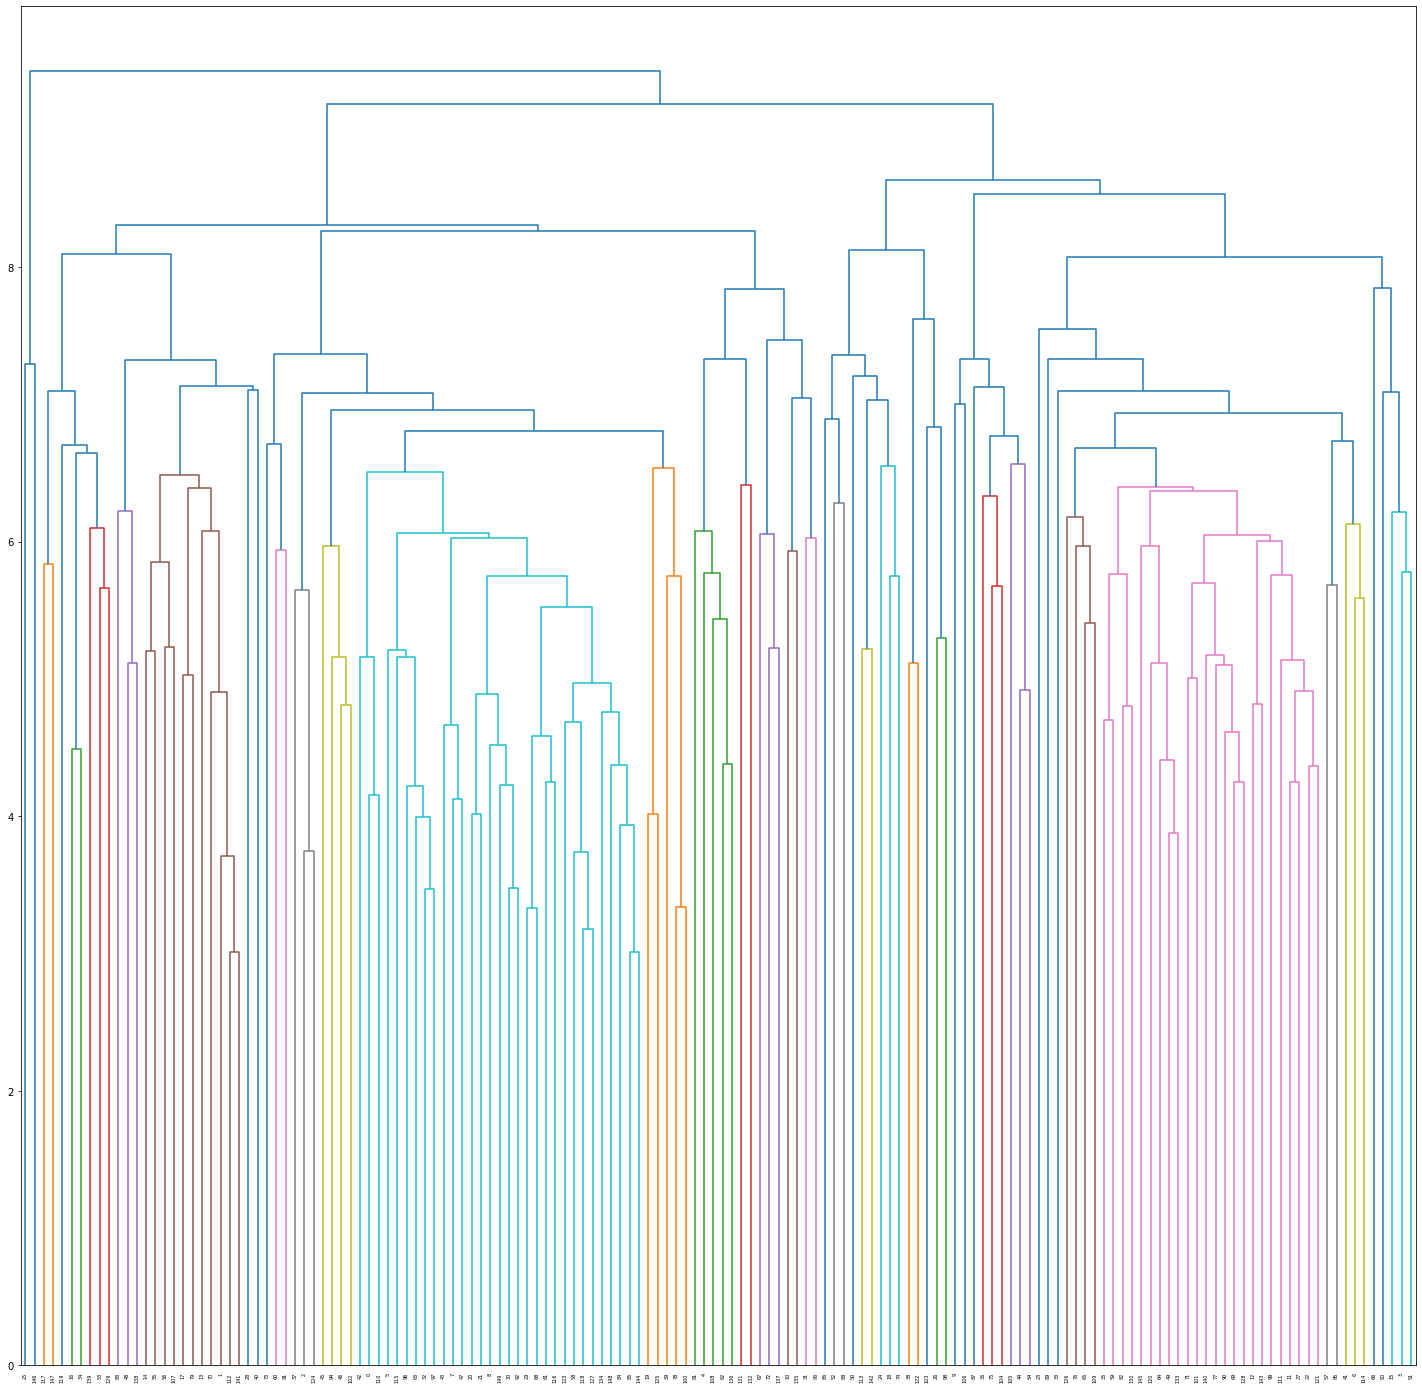

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage, fclusterdata

linkageData = linkage(df,method='average',metric='euclidean')

plt.figure(figsize=(25,25))
dendrogram(linkageData)
plt.show()


In [45]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='average')

unique = np.unique(clusterLabels)
print(unique)

[1 2 3]


In [48]:
from sklearn.metrics import silhouette_samples,silhouette_score

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

For n_clusters = 3 The average silhouette_score is : 0.12417566491377063
[ 0.1764863   0.22777622  0.14998846  0.13232816  0.08915257  0.27801
  0.21088577  0.26574815  0.19128387  0.02009656 -0.03420116  0.2030567
  0.21059914  0.06143479  0.02829859  0.09999574  0.06955024  0.06433315
  0.01737643  0.22367287  0.22838273  0.25413935  0.22834841  0.19977436
  0.22106294  0.22385641 -0.02560718  0.28120492 -0.00642992  0.00427059
  0.17768711  0.09986057  0.28328985  0.18199207  0.00584896  0.16591796
  0.18682549  0.1344547  -0.02403191  0.01301578  0.04815912  0.23391282
  0.24226173  0.23149886  0.01353358  0.21918542  0.06980646  0.25680953
 -0.09242961  0.21231891 -0.04110675  0.15574585  0.05756022  0.06867166
 -0.01852492  0.03252296  0.0060392   0.19127009  0.2058291   0.21631208
  0.0860264   0.08056973  0.12731743  0.26708752  0.14830249  0.14230226
  0.12193282  0.06164752  0.03300251  0.26981776  0.18502902  0.21795569
  0.09977553 -0.05658858 -0.05271364  0.04525816  0.078

In [50]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='single')

unique = np.unique(clusterLabels)
print(unique)

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

[1 2 3]
For n_clusters = 3 The average silhouette_score is : -0.011192664746153748
[-0.02037898  0.14129824  0.02395789 -0.27694658  0.06008965  0.14755236
 -0.08148371  0.1444645   0.05504122 -0.0021884   0.03232535 -0.07891795
 -0.11670537  0.0180604  -0.00461222 -0.2494445   0.04603     0.08701775
 -0.06565079  0.1077465   0.06840061  0.11344398  0.02441265 -0.04193057
 -0.10541409  0.         -0.07027749 -0.10588916  0.0198239  -0.09191153
  0.06533724 -0.08068471  0.1670328  -0.15346142 -0.10454495  0.04874767
  0.05546642 -0.06806104 -0.06834872 -0.0840137  -0.1294052  -0.22063245
  0.15198769  0.09491734 -0.0203146   0.08895168 -0.1029541   0.08584709
  0.0879937  -0.15537295 -0.06558339 -0.23416612 -0.13365458 -0.0726363
  0.06801319  0.04545752  0.11045859  0.07456022  0.00639587  0.06538986
 -0.09941793 -0.07971722  0.06631568  0.14711164 -0.07287512 -0.12550671
 -0.21273629  0.05690737 -0.07134293 -0.18015566  0.06665843 -0.10035259
  0.02409607 -0.28432296 -0.10630201  0.07

In [54]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='complete')

unique = np.unique(clusterLabels)
print(unique)

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

[1 2 3]
For n_clusters = 3 The average silhouette_score is : 0.09859457538210518
[-0.18294314  0.2115087   0.16574902  0.21406806  0.17585187  0.18917598
  0.15266164  0.19357074  0.12096126 -0.03394944  0.03402646  0.20134921
  0.19229515 -0.02373595 -0.00782757  0.19372385 -0.02631025 -0.01324211
 -0.02116644  0.00944178  0.14494145  0.12136278  0.17455075  0.21220053
  0.20908233  0.10152612 -0.05581182  0.25373606 -0.03847508  0.16184742
  0.14686897 -0.08914998  0.13282692  0.09171127 -0.01859553  0.12383375
  0.15853218  0.2105441  -0.05277159  0.13509891 -0.06329688  0.23490868
  0.04666167  0.05452567 -0.03925738  0.1047793   0.18616135  0.18457179
  0.12742984  0.206167   -0.05926415  0.19194407 -0.01074956 -0.06608589
 -0.08547124 -0.03120597  0.03505271  0.18200991  0.11134449  0.21536562
  0.09953166  0.10241712  0.15569643  0.19597706  0.17032013  0.15378972
  0.0718006  -0.06391213  0.19127235  0.23782583  0.16196863  0.21499642
 -0.10106243  0.16881153 -0.03154319 -0.009

In [55]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='weighted')

unique = np.unique(clusterLabels)
print(unique)

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

[1 2 3]
For n_clusters = 3 The average silhouette_score is : 0.09932515562785575
[ 0.35318475 -0.21285438  0.25060412  0.23035134 -0.02863303  0.28064265
 -0.10657621  0.32405856  0.25776906 -0.01005928  0.09540461 -0.01117322
  0.07031607  0.0491282   0.02959029  0.2365203  -0.00587318  0.0509998
  0.02468579  0.29709731  0.29351818  0.32572168  0.01197286  0.05341638
  0.00612603  0.1030656  -0.0312707  -0.0211657   0.01571319  0.31470456
  0.28758749 -0.06700137  0.2671519   0.02889455  0.01470516  0.11617291
  0.02326411  0.2720208  -0.01785371  0.28238985 -0.03493935 -0.07797069
  0.25817449  0.24971058 -0.02430268  0.30523972  0.31858975  0.27186257
  0.11143446  0.11026187 -0.01582665  0.29869183  0.05566766 -0.04835755
 -0.0179268   0.01553495  0.08655241  0.0337196   0.21690532  0.09656132
  0.26467581  0.33876221 -0.04981764  0.2743632   0.12992529  0.01261697
  0.14114669 -0.02127903  0.32235154 -0.163317   -0.15032584  0.06280269
 -0.06490032  0.25510765  0.02219542  0.0140

In [56]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='centroid')

unique = np.unique(clusterLabels)
print(unique)

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

[1 2 3]
For n_clusters = 3 The average silhouette_score is : 0.0375450333283198
[ 0.27883282  0.24382507  0.138448   -0.15328744  0.08127224  0.17887986
 -0.14773475  0.13982312 -0.00823938 -0.06544874  0.05656473 -0.05831302
 -0.00865428  0.04884654  0.17461163 -0.14448391  0.1140351   0.19289267
  0.19917952  0.04277298  0.13750147  0.20227892 -0.19081265  0.
 -0.07187073  0.07917142  0.13855183 -0.12964697 -0.00389892  0.23574398
  0.09511306  0.1767      0.26162943 -0.14799689  0.1484606  -0.12276622
 -0.11658485  0.18070338  0.0036389   0.14272402 -0.09732187 -0.08830467
  0.2143789   0.10950466 -0.18050308  0.15936039  0.14633835  0.16495703
 -0.02878025 -0.11778824  0.07918474 -0.33564916 -0.09284104  0.12542514
 -0.17708604  0.18287389  0.01848911 -0.25475559  0.17008672 -0.07931387
 -0.03831856  0.11848009  0.1480621   0.14176148 -0.04865042  0.03597516
  0.          0.04871657  0.23585474 -0.17465744  0.21789793 -0.20203445
  0.07186338  0.01968159  0.14629656 -0.04164118  0.

In [58]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='ward')

unique = np.unique(clusterLabels)
print(unique)

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

[1 2 3]
For n_clusters = 3 The average silhouette_score is : 0.11276139964998852
[ 0.28615941 -0.12689134  0.19685     0.22389985 -0.03156509  0.23561719
  0.22431927  0.25847565  0.18994641 -0.00726221 -0.06865039  0.22590418
  0.20004736  0.04512294  0.05489119  0.20912841  0.0271041   0.0410779
  0.04333838  0.22156581  0.22992728  0.27184378  0.25535385  0.20752667
  0.18350592 -0.05641037  0.02498358  0.29876512  0.03294235  0.24079873
  0.21551711 -0.06270963  0.23459632  0.19812102  0.03689307  0.15606664
 -0.15493683  0.21661195 -0.02720313  0.17704254  0.02945329  0.24544324
  0.20156601  0.19506931  0.01728961  0.22725613  0.25472679  0.22252857
 -0.10042614  0.18901228  0.02634157  0.1844895   0.02535751 -0.01994227
  0.00769561  0.07312247  0.02037107  0.19752965  0.15189858  0.2025051
  0.17858414  0.25788968 -0.03162774  0.24965139  0.13812483  0.12686233
 -0.07261843  0.03511288  0.22326037  0.28926587 -0.10220723  0.22437729
  0.08358362  0.1776422   0.06274399 -0.00596

In [59]:
from scipy.cluster.vq import kmeans2

In [96]:
while True: 
    centroids, clusterLabels = kmeans2(data=df, k=3, iter=1000, minit='++')
    
    unique = np.unique(clusterLabels)
    #print(unique)
    
    silhouette_avg = silhouette_score(df, clusterLabels)
    #print("For n_clusters =", str(3), "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(df, clusterLabels)
    #
    
    count = 0
    for value in sample_silhouette_values:
        if value <= 0:
            count += 1
    #print("Number of values below 0: ", count)
    if count == 0: 
        finalLabels = clusterLabels
        break 


In [99]:
sample_silhouette_values = silhouette_samples(df, finalLabels)
count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print(count)

0


In [101]:
finalLabels = finalLabels + 1
finalLabels

array([2, 2, 2, 1, 3, 2, 1, 2, 3, 3, 1, 1, 1, 2, 2, 1, 2, 3, 2, 3, 3, 3,
       1, 1, 1, 2, 2, 1, 2, 2, 3, 3, 3, 1, 2, 1, 1, 2, 2, 2, 2, 1, 3, 2,
       3, 3, 3, 2, 1, 1, 2, 1, 3, 2, 3, 2, 2, 1, 2, 1, 3, 2, 3, 3, 1, 1,
       1, 3, 2, 1, 2, 1, 3, 2, 2, 3, 1, 1, 2, 3, 1, 3, 1, 1, 2, 3, 1, 3,
       3, 1, 1, 2, 3, 3, 3, 1, 3, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 1, 3, 1,
       3, 1, 2, 2, 1, 3, 3, 2, 2, 1, 1, 1, 2, 2, 2, 3, 1, 2, 1, 2, 1, 2,
       3, 1, 2, 3, 3, 3, 1, 2, 1, 2, 2, 1, 3, 1, 2, 2, 2, 3], dtype=int32)

In [104]:
finalLabels = pd.DataFrame(finalLabels,columns=['Cluster label'])
df['Cluster label'] = finalLabels

df.to_csv("/Users/filippo/ScrivaniaLocale/E-HealthProject/datasetWithClusterLabels.csv")